# Project(4): Unsupervised learning with NLP : 

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# Project Name: The SMS is Spam or Ham 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://thumbs.dreamstime.com/b/businessmen-get-advertising-phishing-spreading-malware-irrelevant-unsolicited-spam-message-spam-unsolicited-messages-malware-128469034.jpg")

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# - Introdaction : 

We are a communications company that cares about fulfilling our customers' desires and listening to their requirements.

Thus, we received many complaints about the large number of unclear messages they had, which caused a lack of distinction between ham and spam messages.

To solve this problem due to the desire of our customers, we used a set of data and artificial intelligence algorithms to create a model and training to classify messages in terms of their type, whether they are ham or spam.


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# Table of Content:

1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA EXPLORATION

   3.1 FEATURE ENGINEERING

   3.2 OUTLIER DETECTION

4. DATA PREPREPROCESSING

   4.1 CLEANING TEXT
   
   4.2 TOKENIZATION
   
   4.3 REMOVING STOPWORDS
   
   4.4 LEMMATIZATION

5. VECTORIZATION

6. StandardSclaer Data

7. Reduce the dimensionality of the data:

8. MODEL BUILDING

9. END

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 1. IMPORTING LIBRARIES

In [2]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline    
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 2. LOADING DATA

In [3]:
# Load the data : 
path="C:\\Users\\abo fisel\\Desktop\\project\\NBM_Classification_Gamma2\\Unsupervised\\curriculum\\"

data = pd.read_csv(path+'spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


> Drop Columns not need :

In [4]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns
data.rename(columns = {"v1":"label", "v2":"Text"}, inplace = True)
data.head()

,label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 3. DATA EXPLORATION

Text(0, 0.5, 'Number of Data points')

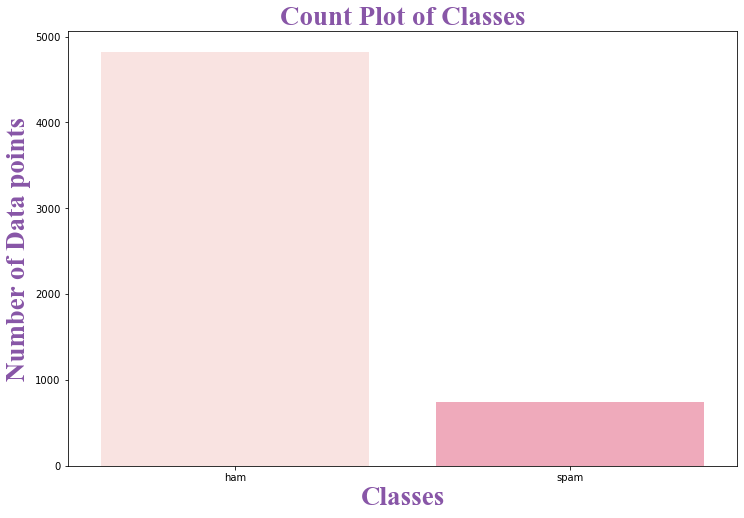

In [5]:
cols= ['#fde0dd','#fa9fb5','#c51b8a'] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["label"], palette= cols)
fg.set_title("Count Plot of Classes", color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
fg.set_xlabel("Classes", color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
fg.set_ylabel("Number of Data points", color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")


In [7]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
data.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

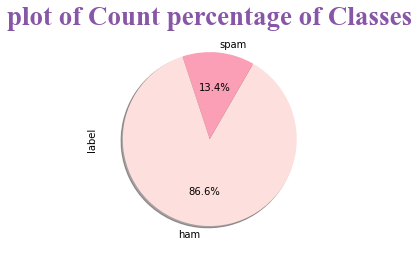

In [9]:
data.label.value_counts().plot.pie( autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=cols)
plt.title("plot of Count percentage of Classes", color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.show()

In [10]:
#How many NULLs/ missing values
data.isnull().value_counts()

label  Text 
False  False    5572
dtype: int64

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 3.1 FEATURE ENGINEERING

For the purpose of data exploration, we are creating new features

* No_of_Characters: Number of characters in the text message
* No_of_Words: Number of words in the text message
* No_of_sentence: Number of sentences in the text message

> Adding a column of numbers of charachters,words and sentences :

In [6]:
data["No_of_Characters"] = data["Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.058327,59.623937,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699928,13.738763,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.993001,1.503584,1.0,1.0,2.0,2.0,38.0


In [12]:
data.describe()

,No_of_Characters,No_of_Words,No_of_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.058327,18.699928,1.993001
std,59.623937,13.738763,1.503584
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


<Figure size 864x576 with 0 Axes>

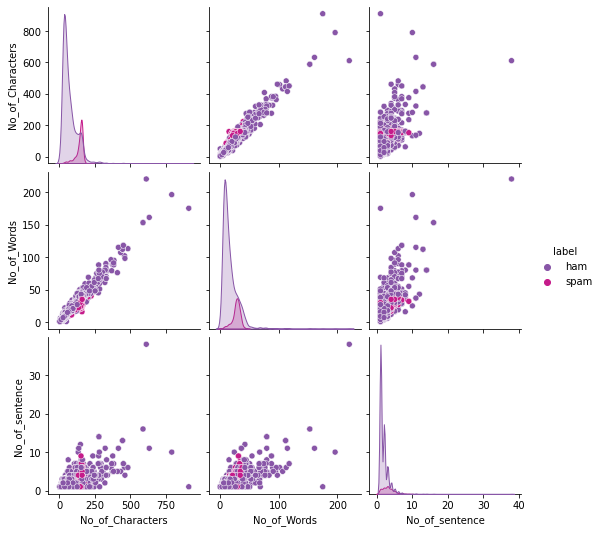

In [13]:
colors= ['#8856a7','#c51b8a'] 
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="label",palette=colors)
plt.show(fg)

Note: From the pair plot, we can see a few outliers all in the class ham. This is interesting as we could put a cap over one of these. As they essentially indicate the same thing ie the length of SMS.

Next, I shall be dropping the outliers

# 3.2 OUTLIER DETECTION

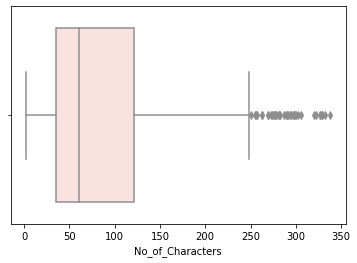

In [14]:
sns.boxplot(x= data[data["No_of_Characters"]<350]["No_of_Characters"],palette=cols);

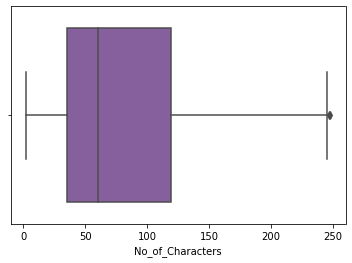

In [15]:
sns.boxplot(x= data[data["No_of_Characters"]>0][data["No_of_Characters"]<250]["No_of_Characters"],palette=colors);

> Dropping Outlier:

In [7]:
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 5)

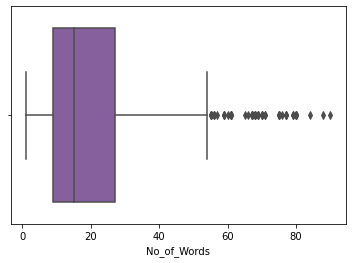

In [17]:
sns.boxplot(x= data[data["No_of_Words"]<350]["No_of_Words"],palette=colors);

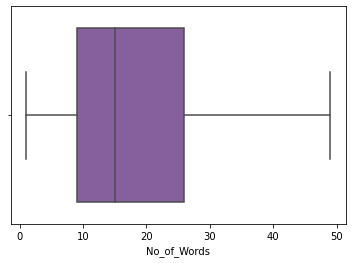

In [18]:
sns.boxplot(x= data[data["No_of_Words"]>0][data["No_of_Words"]<50]["No_of_Words"],palette=colors);

In [19]:
data.shape

(5548, 5)

<Figure size 864x576 with 0 Axes>

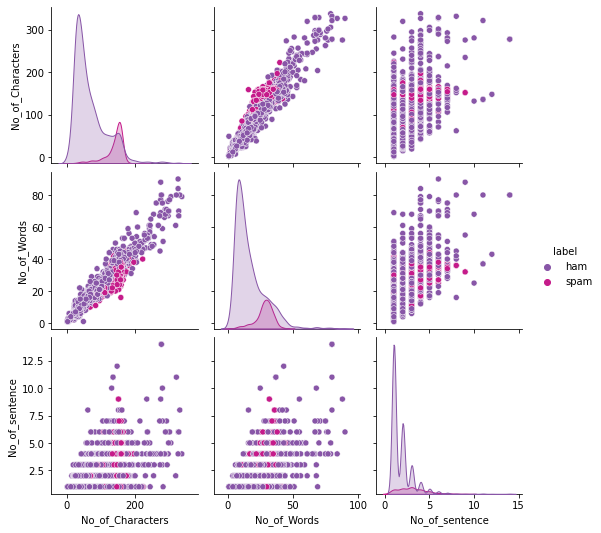

In [20]:
colors= ['#8856a7','#c51b8a'] 
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="label",palette=colors)
plt.show(fg)

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 4. DATA PREPREPROCESSING

> NLP Steps:

# 4.1 CLEANING TEXT

The data cleaning process NLP is crucial. The computer doesn’t understand the text. for the computer, it is just a cluster of symbols. To further process the data we need to make the data cleaner.

>First: Removing punctuation Converting text to lowercase

In [8]:
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) # Replacing all non-alphabetic characters with a space
    sms = sms.lower() # converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["Text"].apply(Clean)
print(" The First 7 Texts after cleaning:",*data["Clean_Text"][:7], sep = "\n")

 The First 7 Texts after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent


# 4.2 TOKENIZATION

> Second : TOKENIZATION 

" is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, 
characters, or subwords. Hence, tokenization can be broadly classified into 3 types –
word, character, and subword (n-gram characters) tokenization."

In [9]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
print(" The First 7 Texts after Tokenizing:",*data["Tokenize_Text"][:7], sep = "\n")

 The First 7 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']
['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'pate

# 4.3 REMOVING STOPWORDS

> Third : Stopwords Step 

"Are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.
Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc... add no meaning to the statement while parsing it."

In [10]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)
print(" The First 7 Texts after removing the stopwords:",*data["Nostopword_Text"][:7], sep = "\n")

 The First 7 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']


#  4.4 LEMMATIZATION

> Fourth : lemmatization 

"In simpler forms, a method that switches any kind of a word to its base root mode is called Lemmatization."

"In other words, Lemmatization is a method responsible for grouping different inflected forms of words into the root form, having the same meaning. It is similar to stemming, in turn, it gives the stripped word that has some dictionary meaning. The Morphological analysis would require the extraction of the correct lemma of each word. "

In [11]:
lemmatizer = WordNetLemmatizer()

# lemmatize string

def lemmatize_word(text):
    
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("The First 7 Texts after lemitization:",*data["Lemmatized_Text"][:7], sep = "\n")

The First 7 Texts after lemitization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']


# 5. VECTORIZATION

> Fifth : VECTORIZITION
    
"The process of converting words into numbers are called Vectorization"

> Steps in the Vectorizing:

* 1 Creating a corpus of lemmatized text
* 2 Converting the corpus in vector form
* 3 Label Encoding the classes in Target

In [12]:
#1 Creating a corpus of text feature to encode further into vectorized form : 
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print(" The First 7 lines in corpus :",*corpus[:7], sep = "\n")

 The First 7 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though
freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
even brother like speak treat like aid patent


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
dt = pd.DataFrame(X, columns=vectorizer.get_feature_names())

In [14]:
X.dtype

dtype('int64')

In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
dt.columns[109]

'afternoon'

In [17]:
dt

,aa,aah,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6.StandardSclaer Data

> StandardSclaer() function  

In [18]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler  
# Initializing a variable with the StandardSclaer() function  
scalerFD = StandardScaler()  
# Transforming the data of dataset with Scaler  
df_scaled = scalerFD.fit_transform(dt)  
# To make sure that data will follow gaussian distribution  
# We will normalize the scaled data with normalize() function  
df_normalized = normalize(df_scaled)  
# Now we will convert numpy arrays in the dataset into dataframes of panda  
df_normalized = pd.DataFrame(df_normalized)  

# 7.Reduce the dimensionality of the data:

> PCA Step:

In [19]:
# Initializing a variable with the PCA() function  
from sklearn.decomposition import PCA
pcaFD = PCA(n_components = 2) # components of data  
# Transforming the normalized data with PCA  
df_principal = pcaFD.fit_transform(df_normalized)  
# Making dataframes from the transformed data  
df_principal = pd.DataFrame(df_principal)  
# Creating two columns in the transformed data  
df_principal.columns = ['C1', 'C2']  
# Printing the head of the transformed data  
print(df_principal.head())

         C1        C2
0 -0.045965  0.005763
1  0.017659 -0.038274
2 -0.078419  0.019931
3 -0.022326 -0.004280
4 -0.027775 -0.003629


****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 8. MODEL BUILDING

> We use three models for cluster :
* K-means
* Hierarchical
* DBScan

> We use the Elbow Function To find the number of Cluster

> K-means Model:

In [30]:
from sklearn.cluster import KMeans

wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(dt)
    wcss.append(kmeans.inertia_)

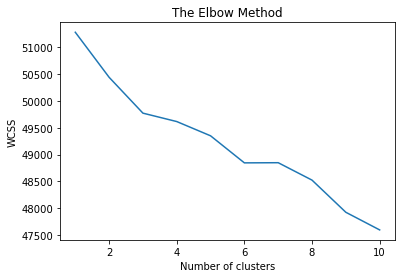

In [31]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
X = dt.iloc[:, [0, 1, 2,3]].values

In [36]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 6 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(dt)

In [21]:
dt= np.array(dt)

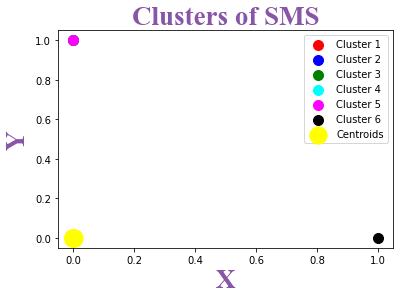

In [41]:
# Visualising the clusters

plt.scatter(dt[Y_Kmeans == 0, 0], dt[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(dt[Y_Kmeans == 1, 0], dt[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(dt[Y_Kmeans == 2, 0], dt[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(dt[Y_Kmeans == 3, 0], dt[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(dt[Y_Kmeans == 4, 0], dt[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')
plt.scatter(dt[Y_Kmeans == 5, 0], dt[Y_Kmeans == 5,1],s = 100, c='black', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of SMS',color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.xlabel('X',color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.ylabel('Y',color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.legend()
plt.show()

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

> Hierarchical Model:

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit_predict(df_normalized)
labels = cluster.labels_
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
df_normalized= np.array(df_normalized)

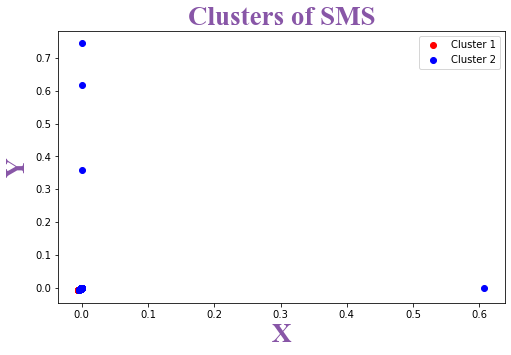

In [24]:
#Plotting the results
 
plt.figure(figsize = (8,5))
plt.scatter(df_normalized[labels == 0 , 0] , df_normalized[labels == 0 , 1] , c = 'red', label = 'Cluster 1')
plt.scatter(df_normalized[labels == 1 , 0] , df_normalized[labels == 1 , 1] , c = 'blue', label = 'Cluster 2')
plt.title('Clusters of SMS',color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.xlabel('X',color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.ylabel('Y',color="#8856a7",size=27,fontname="Times New Roman",fontweight="bold")
plt.legend()
plt.show()

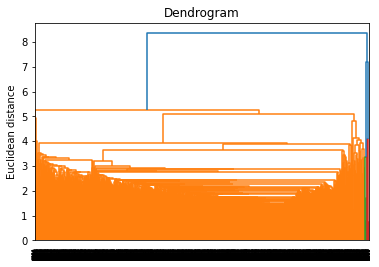

In [26]:
from scipy.cluster.hierarchy import dendrogram , linkage
#Linkage Matrix
Z = linkage(df_normalized, method = 'ward')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

> DBScan Model:

In [34]:
from sklearn.cluster import DBSCAN  
# Importing StandardSclaer and normalize from preprocessing module of Sklearn library  
from sklearn.preprocessing import StandardScaler 

In [35]:
# Tuning the parameters of the model inside the DBSCAN function  
dts = DBSCAN(eps = 0.0375, min_samples = 50).fit(X)  
# Labelling the clusters of data points  
labeling = dts.labels_ 

In [36]:
no_clusters = len(np.unique(labeling) )
no_noise = np.sum(np.array(labeling) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 11


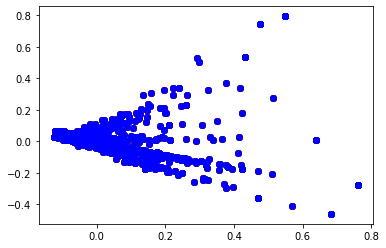

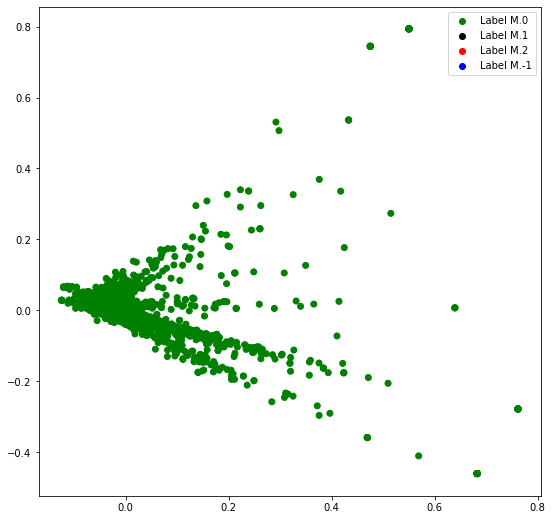

In [39]:
# Visualization of clustering model by giving different colours  
colours = {}  
# First colour in visualization is green  
colours[0] = 'g'  
# Second colour in visualization is black  
colours[1] = 'k'  
# Third colour in visualization is red  
colours[2] = 'r'  
# Last colour in visualization is blue  
colours[-1] = 'b'  
# Creating a colour vector for each data point in the dataset cluster  
cvec = [colours[label] for label in labeling]  
# Construction of the legend  
# Scattering of green colour  
g = plt.scatter(df_principal['C1'], df_principal['C2'], color ='g');  
# Scattering of black colour  
k = plt.scatter(df_principal['C1'], df_principal['C2'], color ='k');  
# Scattering of red colour  
r = plt.scatter(df_principal['C1'], df_principal['C2'], color ='r');  
# Scattering of green colour  
b = plt.scatter(df_principal['C1'], df_principal['C2'], color ='b');   
# Plotting C1 column on the X-Axis and C2 on the Y-Axis  
# Fitting the size of the figure with figure function  
plt.figure(figsize =(9, 9))  
# Scattering the data points in the Visualization graph  
plt.scatter(df_principal['C1'], df_principal['C2'], c = cvec)  
# Building the legend with the coloured data points and labelled  
plt.legend((g, k, r, b), ('Label M.0', 'Label M.1', 'Label M.2', 'Label M.-1'))  
# Showing Visualization in the output  
plt.show()  

> Remove the noise:

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# 9. END

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# -------------------------names trainees-------------------------

* Nada alqabbani
* Shahad almubki
* Nada alhamad
* Sarah alameer
* Hala almulhim


# Instructor:


> Mohammed Baddar 

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************